In [6]:
import numpy
import matplotlib
import pylab
import scipy.interpolate as interp
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})


# Load data

In [7]:
Data=numpy.loadtxt("SF6Modes.csv",delimiter=',')

In [8]:

# Energy per mode
Es=Data[:,0]
# Relative prob per mode
Ns=Data[:,1]
# Is it observable energy?
IsObs=Data[:,2]

# List of mode number indices
ModeNumsPrime=numpy.arange(0,len(Ns)+1)
ModeNums=numpy.arange(0,len(Ns))



#Normalized, cumulative, and lookup
NormNs=Ns/sum(Ns)
CumtvN=numpy.concatenate([[0],numpy.cumsum(NormNs)])
LookupFunction=interp.interp1d(CumtvN,ModeNumsPrime,kind='linear')

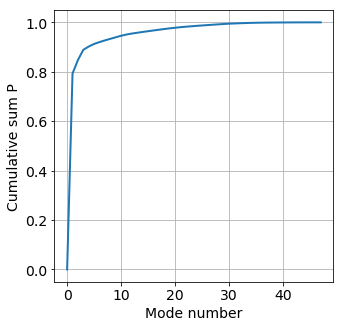

In [9]:
#Plot cumulative distribution
pylab.figure(figsize=(5,5))
pylab.grid()
pylab.plot(CumtvN,linewidth=2)
pylab.xlabel("Mode number")
pylab.ylabel("Cumulative sum P")

# One Run Through 

In [10]:
#Generate one event at the Q value and spend energy into random modes. Make plots.

In [11]:
EnergyToSpend=3e6
EThresh=15
ELeft=EnergyToSpend
ExcitationsSpent=numpy.zeros_like(Ns)

In [12]:
count=0
MaxCount=1e9
while((ELeft>EThresh) and (count<MaxCount)):
    count=count+1
    ModeNum=int(LookupFunction(numpy.random.rand()))
    EThisMode=Es[ModeNum]
    ELeft=ELeft-EThisMode
    ExcitationsSpent[ModeNum]+=1
#    print ELeft

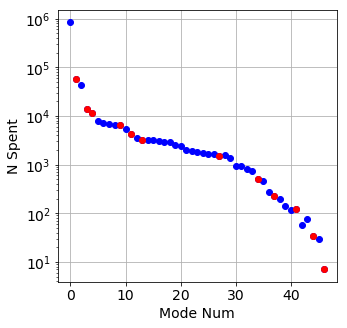

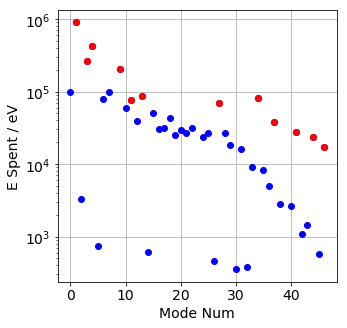

In [13]:
pylab.figure(figsize=(5,5))
pylab.semilogy(ModeNums,ExcitationsSpent,'o',color='blue')
pylab.semilogy(ModeNums,ExcitationsSpent*IsObs,'o',color='red')
pylab.xlabel("Mode Num")
pylab.ylabel("N Spent")
pylab.grid()
pylab.show()
pylab.figure(figsize=(5,5))
pylab.semilogy(ModeNums,ExcitationsSpent*Es,'o',color='blue')
pylab.semilogy(ModeNums,ExcitationsSpent*Es*IsObs,'o',color='red')
pylab.xlabel("Mode Num")
pylab.ylabel("E Spent / eV")
pylab.grid()
pylab.show()

In [14]:
print("Energy in obs: ", sum(ExcitationsSpent*Es*IsObs))
print("All energy: ", sum(ExcitationsSpent*Es))
print("Frac: ", sum(ExcitationsSpent*Es*IsObs)/sum(ExcitationsSpent*Es))

Energy in obs:  2211666.72
All energy:  2999998.52499
Frac:  0.737222602471


# With Trials

In [ ]:
# Generate many low energy events to study event-to-event fluctuations

In [ ]:
NEvents=1000
EventEnergy=100000
VisibleEnergy=[]
VisibleQuanta=[]


for i in range(0,NEvents):
    ExcitationsSpent=numpy.zeros_like(Ns)
    ELeft=EventEnergy
    while((ELeft>EThresh)):
        ModeNum=int(LookupFunction(numpy.random.rand()))
        ELeft=ELeft-Es[ModeNum]
        ExcitationsSpent[ModeNum]+=1
    VisibleEnergy.append(sum(ExcitationsSpent*IsObs*Es))
    VisibleQuanta.append(sum(ExcitationsSpent*IsObs))
    if(i%50==0):
        print(i,)

0
50


In [ ]:
pylab.hist(VisibleQuanta)

In [ ]:
ResE=numpy.std(VisibleEnergy)/numpy.average(VisibleEnergy)
print("Resn on visible energy",ResE)

In [ ]:
ResQ=numpy.std(VisibleQuanta)/numpy.average(VisibleQuanta)
print("Resn on quanta",ResQ)

In [ ]:
binomial=1./numpy.sqrt(numpy.average(VisibleQuanta))
print("Resn on quanta from binomial",binomial)


In [ ]:
F1=ResQ/binomial
F2=ResE/binomial

In [ ]:
print("Quanta Fano", F1**2)
print("Energy Fano", F2**2)